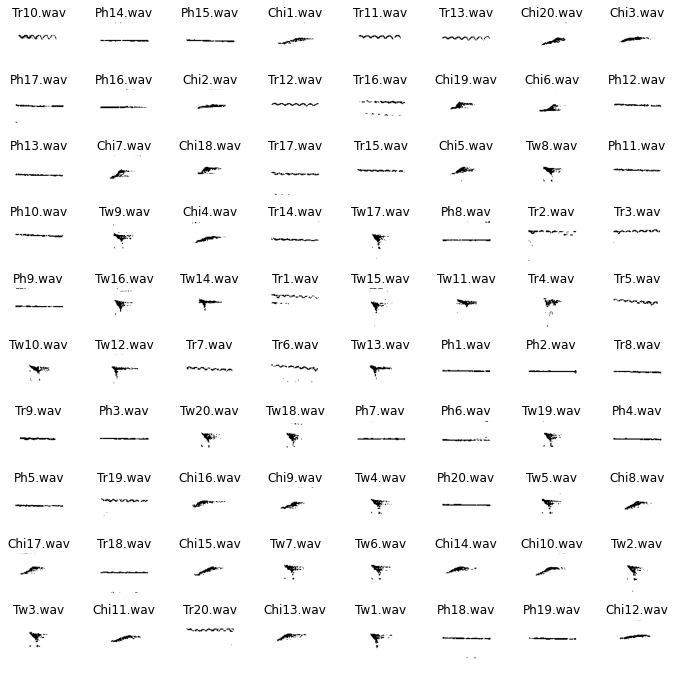

1.0


In [132]:
import wave
import os
import glob
import soundfile as sf
from scipy.signal import spectrogram
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
    
VOLUME_AMP_MULTIPLE = 20
NPERSEG = 256
NOVERLAP = int(NPERSEG * 0.25)
WINDOW = 'hanning'
SPECTROGRAM_RAW_LOW = 1
SPECTROGRAM_RAW_HIGH = 4
SPECTROGRAM_POWER_FACTOR = 4
LOWCUT = 4500
HIGHCUT = 9500
SPECTROGRAM_HEIGHT = int(64)
morph_elem = 0
morph_size = 0
morph_operator = 0
element=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
rows=10
cols=8
#figure, ax = plt.subplots(nrows=rows,ncols=cols )
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
    
directory = '/Users/rogierlandman/from_Samsung/Samvaran_training_data/Syllables/'
os.chdir(directory)
wavefiles = glob.glob('*.wav')
imstack=pd.DataFrame()
for idx, wavefile in enumerate(wavefiles):
    data, samplerate = sf.read(wavefile) 
    #print(len(data), samplerate)
    #pad to .3sec
    target_length=round(samplerate*0.3)
    actual_length=len(data)
    difference=target_length-actual_length
    d=round(difference/2)
    data=np.pad(data, (d, d), 'constant')
    
    #plt.plot(data)
    #break
    #Pxx, freqs, bins, im = plt.specgram(data, mode='magnitude', scale='dB')
    f, t, spec = spectrogram(data,fs=float(samplerate),window=WINDOW,nperseg=NPERSEG,noverlap=NOVERLAP,mode='magnitude')
    #merge_y = np.ones_like(spec)
    #mask = (spec > 1)
    #n_m = spec[mask]
    #merge_y[mask] = n_m * np.log10(n_m)
    #spec=merge_y
    #spec=np.log10(spec)
    #smallest = np.amin(spec)
    #biggest = np.amax(spec)
    #result = spec.reshape(-1)
    #a=spec-smallest
    #spec = np.divide(a, biggest - smallest) 
    #smallest = np.amin(spec)
    #biggest = np.amax(spec)
    spec = cv2.resize(spec, (100, 100))   
    #print(np.amin(spec), np.amax(spec))
    #spec[spec == 0.0] = 0.0001
    #spec = np.log10(spec)
    #spec = np.flipud(spec)   
    p = np.percentile(spec, 98)
    #th, im_th = cv2.threshold(spec, p, 0, cv2.THRESH_TOZERO); 
    th, im_th = cv2.threshold(spec, p, 1, cv2.THRESH_BINARY)
    #th, im_th = cv2.morphologyEx(im_th, cv2.MORPH_CLOSE, element)
    #th, im_th = cv2.threshold(spec, p, 1, cv2.THRESH_TOZERO_INV);   
    #ax.ravel()[idx].imshow(im_th,cmap='binary')

    ax.ravel()[idx].imshow(im_th,cmap='binary')
    ax.ravel()[idx].set_title(wavefiles[idx])
    ax.ravel()[idx].set_axis_off()
    
    #smallest = np.amin(im_th)
    #biggest = np.amax(im_th)
    #print(smallest, biggest)
    #im_th_s=im_th * 255    
    #ax.ravel()[idx].set_axis_off()
    #im_closed = cv2.morphologyEx(im_th, cv2.MORPH_CLOSE, element)
    #im = im_closed.reshape(1,10000)
    im = im_th.reshape(1,10000)
    if idx==0:
        imstack=im
    if idx>0:
        imstack=np.append(imstack,im,axis=0)
        
#plt.tight_layout()
plt.show()    
#print(imstack.shape)   
#print(idx)
#print(np.max(imstack))

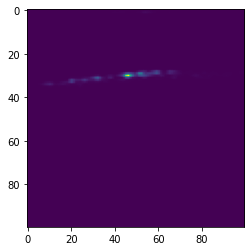

In [46]:
plt.imshow(spec_s)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
print(x.shape)

print(x.max())

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.3, n_components=2, n_epochs=None,
     n_neighbors=5, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Fri Aug 21 21:54:21 2020 Finding Nearest Neighbors
Fri Aug 21 21:54:21 2020 Finished Nearest Neighbor Search
Fri Aug 21 21:54:21 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed 

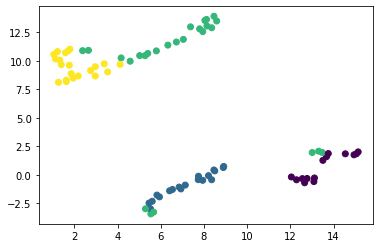

In [100]:
from sklearn.cluster import KMeans
import umap

kmeans = KMeans(n_clusters=4, random_state=0).fit(imstack)

n_neighbors=5
min_dist=0.3
n_components=2
metric='euclidean'
#metric='canberra'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        verbose=True
    )
embedding = fit.fit_transform(imstack);

plt.scatter(embedding[:,0], embedding[:,1],c=kmeans.labels_)
plt.show()

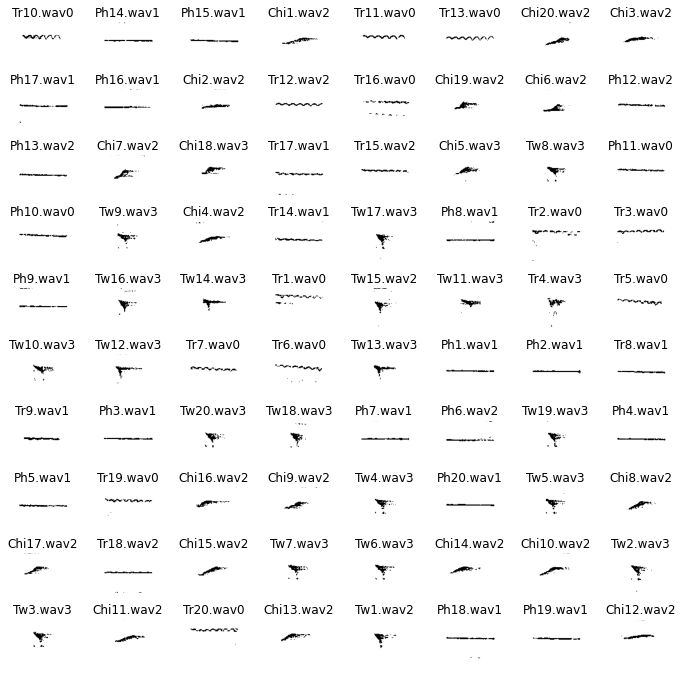

In [126]:
#rows=10
#cols=8
#figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(15,15))
#for idx, wavefile in enumerate(wavefiles):
#    ax.ravel()[idx].imshow(imstack[idx][:].reshape(100,100),cmap='binary')
#    ax.ravel()[idx].set_axis_off()


import matplotlib.pyplot as plt    
fig, ax = plt.subplots(10, 8, figsize=(12, 12)) 
cnt=0
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        ax[i,j].imshow(imstack[cnt][:].reshape(100,100),cmap='binary')
        ax[i,j].set_title(wavefiles[cnt] + str(kmeans.labels_[cnt]))
        ax[i,j].set_axis_off()
        cnt=cnt+1



In [154]:
df = pd.DataFrame(imstack)
test=df.iloc[[74,76,78,79], :]
train=df.iloc[0:73]
t1=df.iloc[[75,77],:]
train=train.append(t1)

In [133]:
from sklearn.model_selection import train_test_split

test=imstack[79][:]
train_data = train_data.reshape(-1, 28,28, 1)
test_data = test_data.reshape(-1, 28,28, 1)


train_X,valid_X,train_ground,valid_ground = train_test_split(imstack,
                                                             imstack, 
                                                             test_size=0.2, 
                                                             random_state=13)

batch_size = 15
epochs = 50
inChannel = 1
x, y = 100, 100
input_img = Input(shape = (x, y, inChannel))

def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()